# vLife: T2D Classification with Data Shapley

### Authors: Virtusa

## PYTHON LIBRARIES USED

In [1]:
import os
import sys
import time
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc,log_loss

from Shapley import ShapNN
from DShap import DShap
from shap_utils import *

MEM_DIR = './'
%matplotlib inline
%load_ext autoreload
warnings.filterwarnings("ignore")

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Introduction

#### Aim:
To demonstrate the usage of data shapley values
#### Dataset Used: 
A dataset containing 9000+ records of patients classifying them into two categories: 1 -> patients having Type-2 Diabetes, 0 -> Patients not having Type-2 Diabetes


In [2]:
diabetes = pd.read_csv('Type2Diabetes1.csv',encoding='unicode_escape')

In [3]:
diabetes=diabetes[:500]

#### Data Cleansing:

- Columns having more than 50% of null values will be deleted
- Fill NaN values by using the mean of the column

In [4]:
diabetes.isna().sum()
diabetes.isna().mean()

diabetes = diabetes.loc[:,diabetes.isna().mean() <= .5]
diabetes = diabetes.fillna(diabetes.mean())

## Data Preparation For Calculating Shapley values

In [5]:
x = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,[-1]]

In [6]:
y = y.astype(int)

#### Split data into train and test set
Dataset is split into two sets using train_test_split() scikit function where 80% and 20% are of train and test respectively.

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = x_train.values
y_train = y_train.values

#### Convert X_test and y_test into array type

In [8]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [9]:
np.unique(y_test)

array([0, 1])

#### Convert list of lists to a single list

In [10]:
Y_train = []
for i in y_train:
    Y_train.extend(i)

In [11]:
Y_test = []
for i in y_test:
    Y_test.extend(i)

#### Convert to an array type for running Shapley

In [12]:
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

In [13]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Data Shapley

- Data Shapley value for a particular contributor, evolved from Shapley Value for cooperative game theory, can be considered as a quantifiable value given to it based on their individual contribution to the final outcome. 
- This theory aims at calculating and quantifying the contributory value of each data point, wherein each data point refers to a record of the dataset. 
- This algorithm finds out how much each record contributes to the final evaluation metric of the model such as accuracy, F1 score, etc.


##### Mention the model to be used e.g logistic, NN etc.

In [14]:
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'

In [15]:
import shutil
shutil.rmtree(directory, ignore_errors=True)

### Main Function Call for Calculating Shapley Values

- This is the main method that invokes all shapley functions and returns Data Shapley values.
- This procedure is done thrice with different seed values so that different permutations of data points are considered.

#### Seed : 0

- dshap.run() calculates the shapley values
- Set g_run and loo_run as False to only calculate TMC_Shapley values

In [16]:
dshap = DShap(x_train, Y_train, x_test, Y_test,num_test, sources=None, model_family=model, metric='accuracy',
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False,loo_run=False)

LOO values calculated!
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley

60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of

20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 

#### Seed : 1

In [17]:
dshap = DShap(x_train, Y_train, x_test, Y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1, g_run=False, loo_run=False)

LOO values calculated!
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley

60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of

20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.


#### Seed : 2

### Merging The Results and Visualizing them

Merge all TMC_Shapley pickle files with different seeds.

In [18]:
dshap.merge_results()

./temp/mem_tmc_0000.pkl
./temp/mem_tmc_0001.pkl
./temp/mem_g_0000.pkl
./temp/mem_g_0001.pkl


#### Plotting Convergence plots
The first 100 sets of tmc-shapley values obtained are plotted as groups of 10, with each increment being of size 1000(i.e num_test size)
- x-axis: num_test (i.e number of data points used for evaluation of metric)
- y-axis: data shapley value

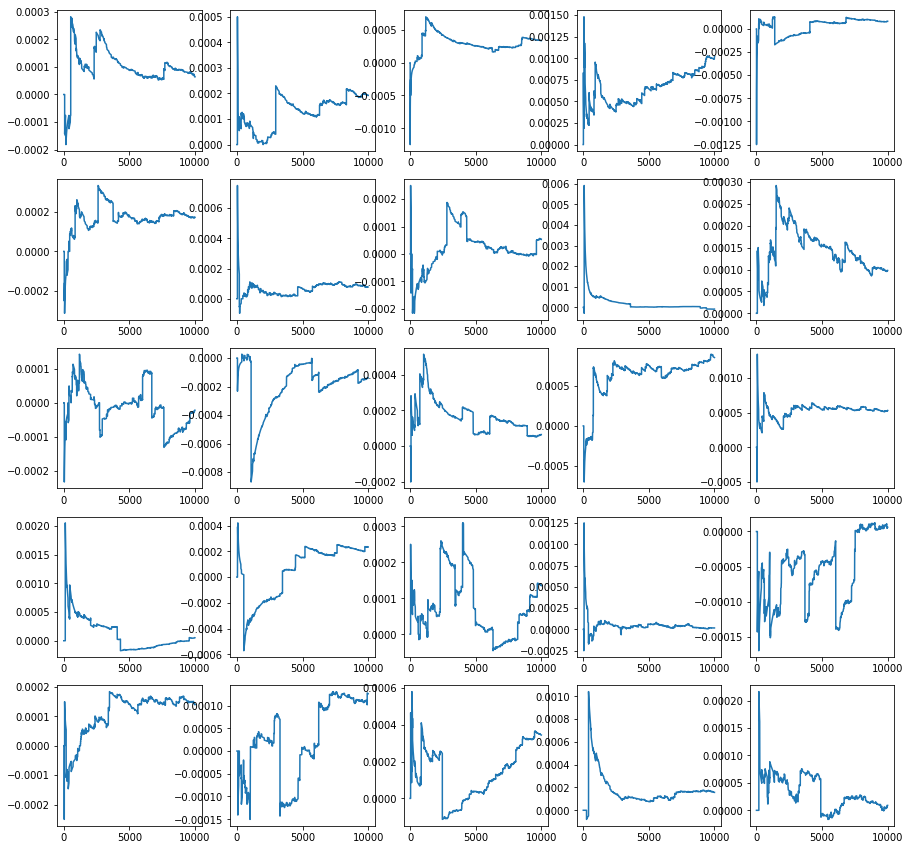

In [19]:
convergence_plots(dshap.marginals_tmc)

The first 100 sets of g-shapley values obtained are plotted as groups of 10, with each increment being of size 1000(i.e num_test size)
- x-axis: num_test (i.e number of data points used for evaluation of metric)
- y-axis: data shapley value

### Negative TMC-Shapley Values
- The data points that have negative (low)TMC-Shapley values are identified and removed from the original dataset

In [20]:
print(dshap.vals_tmc)

[ 4.66666667e-05  2.82222222e-04  4.48888889e-04  1.48888889e-03
  1.02222222e-04  1.93333333e-04  1.13333333e-04  6.22222222e-05
 -2.02222222e-04  3.55555556e-05 -5.11111111e-05 -2.68888889e-04
  4.66666667e-05  1.07111111e-03  4.86666667e-04  3.04444444e-04
  2.51111111e-04  2.75555556e-04 -4.22222222e-05  6.66666667e-05
  1.64444444e-04  2.77777778e-04  7.26666667e-04  2.15555556e-04
  4.00000000e-05  1.93333333e-04  6.42222222e-04  1.33333333e-05
  1.00000000e-04  1.26666667e-04  1.28888889e-04  3.42222222e-04
  4.57777778e-04  3.53333333e-04  2.22222222e-04  2.64444444e-04
  1.95555556e-04  8.22222222e-04  2.55555556e-04  2.00000000e-04
  4.22222222e-04 -4.44444444e-05 -9.11111111e-05  1.62222222e-04
  3.95555556e-04 -7.77777778e-05  1.20000000e-04  4.80000000e-04
  4.26666667e-04  8.88888889e-05  6.00000000e-05  1.77777778e-04
  1.86666667e-04  2.93333333e-04  8.33333333e-04  2.68888889e-04
  6.28888889e-04  1.28666667e-03  3.44444444e-04  6.40000000e-04
  9.11111111e-05  3.77777

##### Listing out the tmc-shapley values of the given dataset

In [22]:
dataTMC = pd.DataFrame({'Column1': dshap.vals_tmc[:]})
print(dataTMC)

      Column1
0    0.000047
1    0.000282
2    0.000449
3    0.001489
4    0.000102
5    0.000193
6    0.000113
7    0.000062
8   -0.000202
9    0.000036
10  -0.000051
11  -0.000269
12   0.000047
13   0.001071
14   0.000487
15   0.000304
16   0.000251
17   0.000276
18  -0.000042
19   0.000067
20   0.000164
21   0.000278
22   0.000727
23   0.000216
24   0.000040
25   0.000193
26   0.000642
27   0.000013
28   0.000100
29   0.000127
..        ...
370 -0.000004
371  0.000602
372  0.000131
373  0.000393
374  0.001022
375  0.000162
376 -0.004160
377  0.000709
378 -0.000016
379  0.000144
380  0.000187
381  0.000062
382  0.000287
383  0.000244
384  0.000276
385 -0.000056
386  0.000038
387  0.001204
388  0.000233
389  0.000129
390  0.000529
391  0.000300
392  0.000233
393 -0.000029
394  0.000153
395  0.000771
396  0.000560
397  0.000164
398  0.000347
399 -0.000018

[400 rows x 1 columns]


##### Sorting out the tmc-shapley values that fall below '0', i.e Low data shapley values

In [23]:
dataNEG_TMC = dataTMC[(dataTMC['Column1']<0)]

##### Creating a list out of the indices of the records having low tmc-shapley values

In [24]:
drop_list_TMC = list(dataNEG_TMC.index.values) 

##### Creating a modified dataframe by dropping the records with indices of negative tmc-shapley values.

In [26]:
modDf_TMC = diabetes[:500].drop(drop_list_TMC)

In [27]:
print(modDf_TMC)

      SEQN      URXUMA      URXUMS    URXUCR.x        URXCRS      URDACT  \
0    73557    4.300000    4.300000   39.000000   3447.600000   11.030000   
1    73558  153.000000  153.000000   50.000000   4420.000000  306.000000   
2    73559   11.900000   11.900000  113.000000   9989.200000   10.530000   
3    73560   16.000000   16.000000   76.000000   6718.400000   21.050000   
4    73561  255.000000  255.000000  147.000000  12994.800000  173.470000   
5    73562  123.000000  123.000000   74.000000   6541.600000  166.220000   
6    73563   41.218854   41.218854  121.072529  10702.811525   41.905695   
7    73564   19.000000   19.000000  242.000000  21392.800000    7.850000   
9    73567   35.000000   35.000000  215.000000  19006.000000   16.280000   
12   73571   25.800000   25.800000  177.000000  15646.800000   14.580000   
13   73572   51.000000   51.000000  144.000000  12729.600000   35.420000   
14   73573    6.300000    6.300000   76.000000   6718.400000    8.290000   
15   73574  

- The modified dataframes can now be used as input for various models.
- These dataframes can be consideredas "clean" data as those records have high data shapley values.
- Records having high data shapley values contribute more to the final performance of the model.

# End